## Assignment: $k$ Means Clustering

## **Do two questions.**

`! git clone https://www.github.com/DS3001/kmc`

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans # Import kmc
from plotly.subplots import make_subplots


**Q1.** This question is a case study for $k$ means clustering.

1. Load the `airbnb_hw.csv` data. Clean `Price` along with `Beds`, `Number of Reviews`, and `Review Scores Rating`.

In [2]:
df1 = pd.read_csv('data/airbnb_hw.csv', low_memory=False).loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']]

# clean Price
df1['Price'] = df1['Price'].str.replace(',','') # remove commas
df1['Price'] = pd.to_numeric(df1['Price'], errors='coerce') # convert from strings to numbers

# number of reviews is clean - numbers, unique
# print(df1['Number Of Reviews'].unique())

# review scors rating - looks good
# print(df1['Review Scores Rating'].unique())

# beds
print(df1['Beds'].value_counts())
print('null beds:',sum(df1['Beds'].isnull()))
df1['Beds'] = df1['Beds'].fillna(1) # replace null with 1 -- seems reasonable

df1.head()
print(df1.shape)
df1.describe() 
# note: looking at count for review scores rating, seems like there are still ~8.3k missing values...
# adding in values would skew data (e.g. -1), can't assume = 0, middle of road is misleading... no good solution

Beds
1.0     20344
2.0      6610
3.0      2071
4.0       783
5.0       284
6.0       177
7.0        45
8.0        24
10.0       16
9.0        15
16.0       13
11.0        5
12.0        4
0.0         2
Name: count, dtype: int64
null beds: 85
(30478, 4)


,Price,Beds,Number Of Reviews,Review Scores Rating
count,30478.000000,30478.000000,30478.000000,22155.000000
mean,163.589737,1.528611,12.018735,91.993230
std,197.785454,1.014327,21.980703,8.850373
min,10.000000,0.000000,0.000000,20.000000
25%,80.000000,1.000000,0.000000,89.000000
50%,125.000000,1.000000,3.000000,94.000000
75%,195.000000,2.000000,13.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


2. Maxmin normalize the data and remove any `nan`'s (`KMeans` from `sklearn` doesn't accept `nan` input).

In [3]:
df1 = df1.dropna()
df1.describe()  # removed all nan's

,Price,Beds,Number Of Reviews,Review Scores Rating
count,22155.000000,22155.000000,22155.000000,22155.000000
mean,154.787633,1.556985,16.505439,91.993230
std,148.836621,1.043273,24.308241,8.850373
min,10.000000,0.000000,1.000000,20.000000
25%,85.000000,1.000000,2.000000,89.000000
50%,125.000000,1.000000,7.000000,94.000000
75%,190.000000,2.000000,20.000000,100.000000
max,10000.000000,16.000000,257.000000,100.000000


In [4]:
def maxmin(z):
    small = z.min()
    big = z.max()
    z = (z-small)/(big-small)
    return z

# Apply maxmin to each column:
df1['real price'] = df1['Price']
df1.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']] = df1.loc[:,['Price','Beds','Number Of Reviews','Review Scores Rating']].apply(maxmin)
df1.describe()

,Price,Beds,Number Of Reviews,Review Scores Rating,real price
count,22155.000000,22155.000000,22155.000000,22155.000000,22155.000000
mean,0.014493,0.097312,0.060568,0.899915,154.787633
std,0.014899,0.065205,0.094954,0.110630,148.836621
min,0.000000,0.000000,0.000000,0.000000,10.000000
25%,0.007508,0.062500,0.003906,0.862500,85.000000
50%,0.011512,0.062500,0.023438,0.925000,125.000000
75%,0.018018,0.125000,0.074219,1.000000,190.000000
max,1.000000,1.000000,1.000000,1.000000,10000.000000


3. Use `sklearn`'s `KMeans` module to cluster the data by `Beds`, `Number of Reviews`, and `Review Scores Rating` for `k=6`.

In [5]:
model = KMeans(n_clusters=6, max_iter=300, n_init = 10, random_state=0) # Create a model 
model = model.fit(df1.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]) # Initialize a kmc model

df1['clusters'] = model.labels_ # connects each listing to where the model thinks it's group should be

4. Use `seaborn`'s `.pairplot()` to make a grid of scatterplots that show how the clustering is carried out in multiple dimensions.

/Users/jonah/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


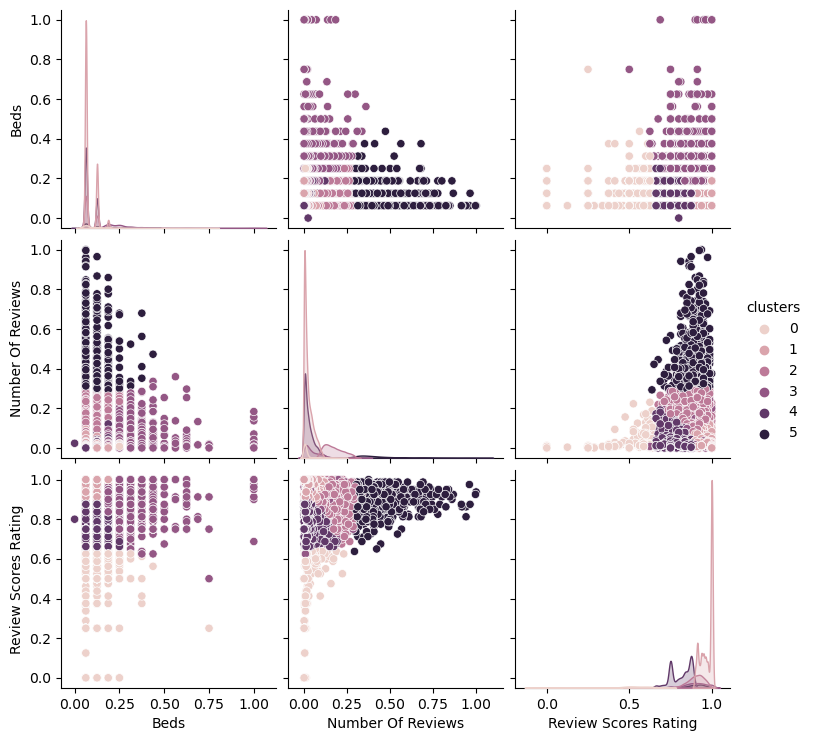

In [6]:
sns.pairplot(df1.loc[:,['Beds','Number Of Reviews','Review Scores Rating','clusters']], hue='clusters')

5. Use `.groupby` and `.describe` to compute the average price for each cluster. Which clusters have the highest rental prices?

In [7]:
df1.loc[:,['real price','clusters']].groupby('clusters').describe()

real price                                                      \
              count        mean         std   min    25%    50%     75%   
clusters                                                                  
0             632.0  133.587025  215.505565  25.0   65.0   99.0  151.25   
1           10529.0  152.287682  147.227153  10.0   85.0  130.0  190.00   
2            3022.0  141.489411   83.936285  22.0   87.0  125.0  175.00   
3            1626.0  293.528905  262.934691  27.0  150.0  229.0  350.00   
4            5554.0  131.631797  102.758887  20.0   75.0  110.0  169.00   
5             792.0  133.224747   83.088608  27.0   80.0  110.0  167.50   

                   
              max  
clusters           
0          5000.0  
1         10000.0  
2          1000.0  
3          4500.0  
4          5000.0  
5           875.0

It appears that cluster $3$ has the highest rental prices with the highest average (but also the most variability overall). 75% of the cluster has prices over $150, which is a higher threshold than any other one (cluster $0$ has just 25% above $151.25, $1$ has 50% above $130, $2$ had 50% above $135, $4$ and $5$ both have 50% above $110... and again, cluster $3$ has 75% of its prices above that level)

There really isn't another close frontrunner to cluster $3$, it has higher average prices at every mark.

6. Use a scree plot to pick the number of clusters and repeat steps 4 and 5.

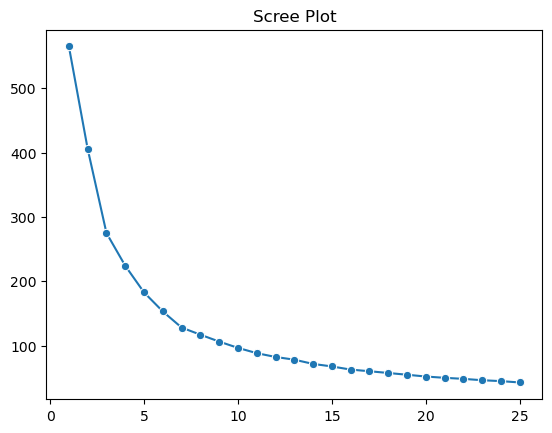

In [8]:
# Create a scree plot:
k_bar = 25
k_grid = np.arange(1,k_bar+1) # The range of k's to consider
SSE = np.zeros(k_bar) # We'll store the training error here
for k in range(k_bar): # For indices from 0 to k_bar-1
    model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
    model = model.fit(df1.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]) # Fit the emodel
    SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    
scree_plot = sns.lineplot(x=k_grid, y=SSE, marker='o').set_title('Scree Plot') # Create scree plot

# 7 appears to be the 'best' number of clusters
# largest drop off before, pretty consistent small drops after

/Users/jonah/miniconda3/envs/ds4003/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


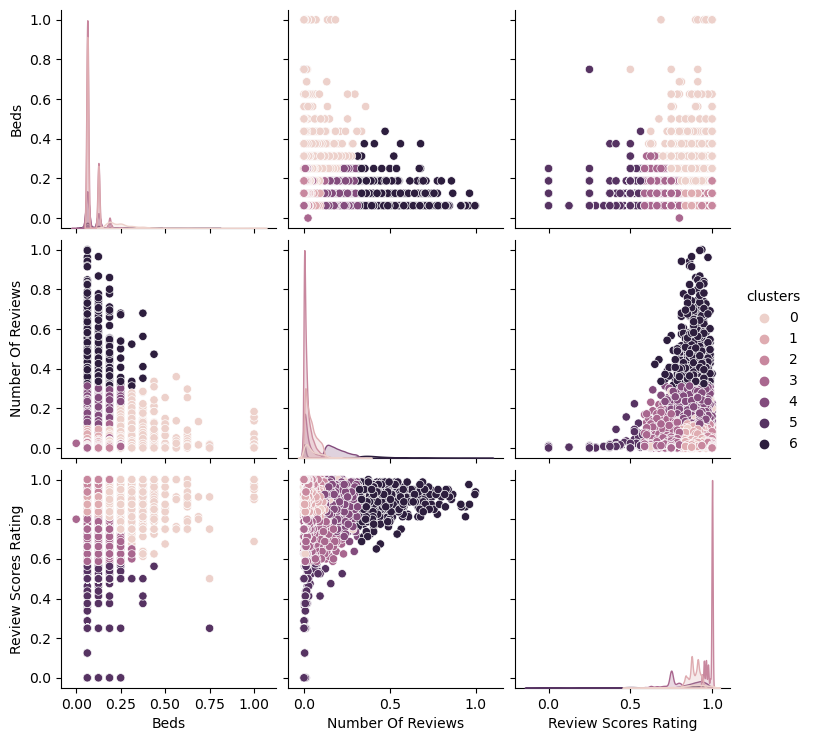

In [9]:
model = KMeans(n_clusters=7, max_iter=300, n_init = 10, random_state=0) # Create a model 
model = model.fit(df1.loc[:,['Beds','Number Of Reviews','Review Scores Rating']]) # Initialize a kmc model

df1['clusters'] = model.labels_ # connects each listing to where the model thinks it's group should be

sns.pairplot(df1.loc[:,['Beds','Number Of Reviews','Review Scores Rating','clusters']], hue='clusters')

In [10]:
df1.loc[:,['real price','clusters']].groupby('clusters').describe()

real price                                                     \
              count        mean         std   min    25%    50%    75%   
clusters                                                                 
0            1672.0  292.111842  260.357991  27.0  150.0  225.0  350.0   
1            6085.0  138.487921  149.888804  24.0   80.0  120.0  175.0   
2            7994.0  154.655742  119.203032  10.0   85.0  130.0  195.0   
3            2737.0  130.762879  124.498226  20.0   70.0  105.0  160.0   
4            2593.0  139.796761   83.970793  22.0   85.0  120.0  175.0   
5             409.0  129.951100  255.342268  25.0   60.0   90.0  150.0   
6             665.0  132.858647   78.216959  29.0   80.0  110.0  165.0   

                   
              max  
clusters           
0          4500.0  
1         10000.0  
2          3500.0  
3          5000.0  
4           895.0  
5          5000.0  
6           649.0

Prices are better distributed with $k=7$, the means are generally closer together, but now cluster `0` is the one with the highest average price ($292), with 75% of it's components prices being greater than the top 25-50% of the other 6 clusters.

Number of beds does not appear to be a huge factor as in the pairplot chart, the beds tend to be distributed along the axis, indicating it not being a connection (consistently a spread when looking at beds)

Interestingly, the number of reviews and review score rating, when combined, their 'best' outcome (large number of reviews, large average score) tends to be pretty much in the middle of price level, with an average price of ~$132 (cluster `6`). However, high reviews (but low numbers of reviews) tended to be on average more expensive (cluster `0`)

**Q2.** This is a question about $k$ means clustering. We want to investigate how adjusting the "noisiness" of the data impacts the quality of the algorithm and the difficulty of picking $k$.

1. Run the code below, which creates four datasets: `df0_125`, `df0_25`, `df0_5`, `df1_0`, and `df2_0`. Each data set is created by increasing the amount of `noise` (standard deviation) around the cluster centers, from `0.125` to `0.25` to `0.5` to `1.0` to `2.0`.

In [11]:
def createData(noise,N=50):
    np.random.seed(100) # Set the seed for replicability
    # Generate (x1,x2,g) triples:
    X1 = np.array([np.random.normal(1,noise,N),np.random.normal(1,noise,N)])
    X2 = np.array([np.random.normal(3,noise,N),np.random.normal(2,noise,N)])
    X3 = np.array([np.random.normal(5,noise,N),np.random.normal(3,noise,N)])
    # Concatenate into one data frame
    gdf1 = pd.DataFrame({'x1':X1[0,:],'x2':X1[1,:],'group':'a'})
    gdf2 = pd.DataFrame({'x1':X2[0,:],'x2':X2[1,:],'group':'b'})
    gdf3 = pd.DataFrame({'x1':X3[0,:],'x2':X3[1,:],'group':'c'})
    df = pd.concat([gdf1,gdf2,gdf3],axis=0)
    return df

df0_125 = createData(0.125)
df0_25 = createData(0.25)
df0_5 = createData(0.5)
df1_0 = createData(1.0)
df2_0 = createData(2.0)

2. Make scatterplots of the $(X1,X2)$ points by group for each of the datasets. As the `noise` goes up from 0.125 to 2.0, what happens to the visual distinctness of the clusters?

<Axes: xlabel='x1', ylabel='x2'>

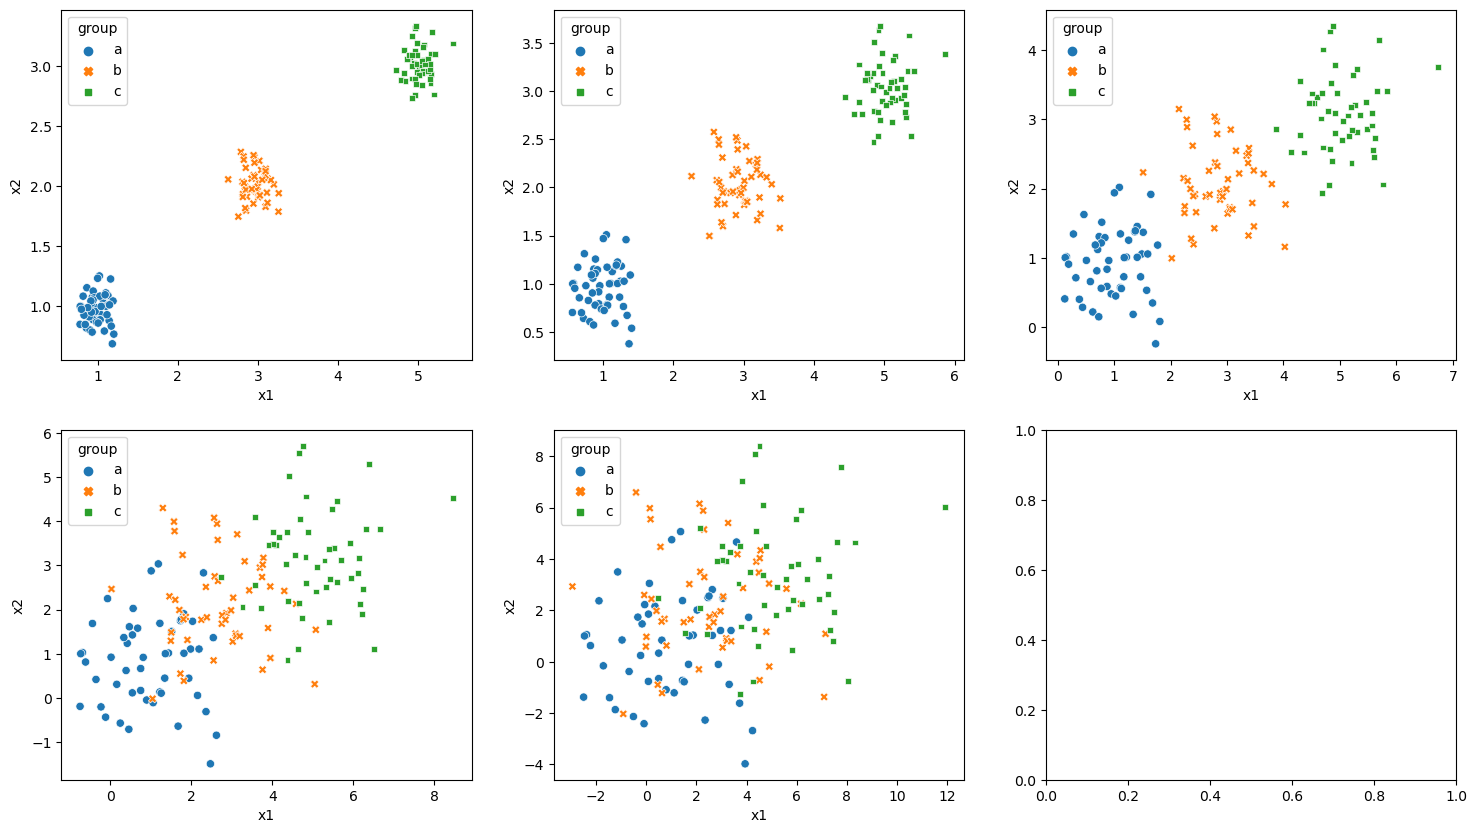

In [21]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


sns.scatterplot(ax=axes[0][0], data = df0_125, x = 'x1',y='x2',hue='group',style='group')   # 0.125: top left
sns.scatterplot(ax=axes[0][1], data = df0_25, x = 'x1',y='x2',hue='group',style='group')    # 0.25:  top center
sns.scatterplot(ax=axes[0][2], data = df0_5, x = 'x1',y='x2',hue='group',style='group')     # 0.5:   top right
sns.scatterplot(ax=axes[1][0], data = df1_0, x = 'x1',y='x2',hue='group',style='group')     # 1.0:   bottom left
sns.scatterplot(ax=axes[1][1], data = df2_0, x = 'x1',y='x2',hue='group',style='group')     # 2.0:   bottom center

# as the noise increases, the visual distinctness of the clusters decreases and it becomes harder to identify
# which cluster is which without the colors

3. Create a scree plot for each of the datasets. Describe how the level of `noise` affects the scree plot (particularly the presence of a clear "elbow") and your ability to definitively select a $k$.

Text(0.5, 1.0, 'Noise: 2.0')

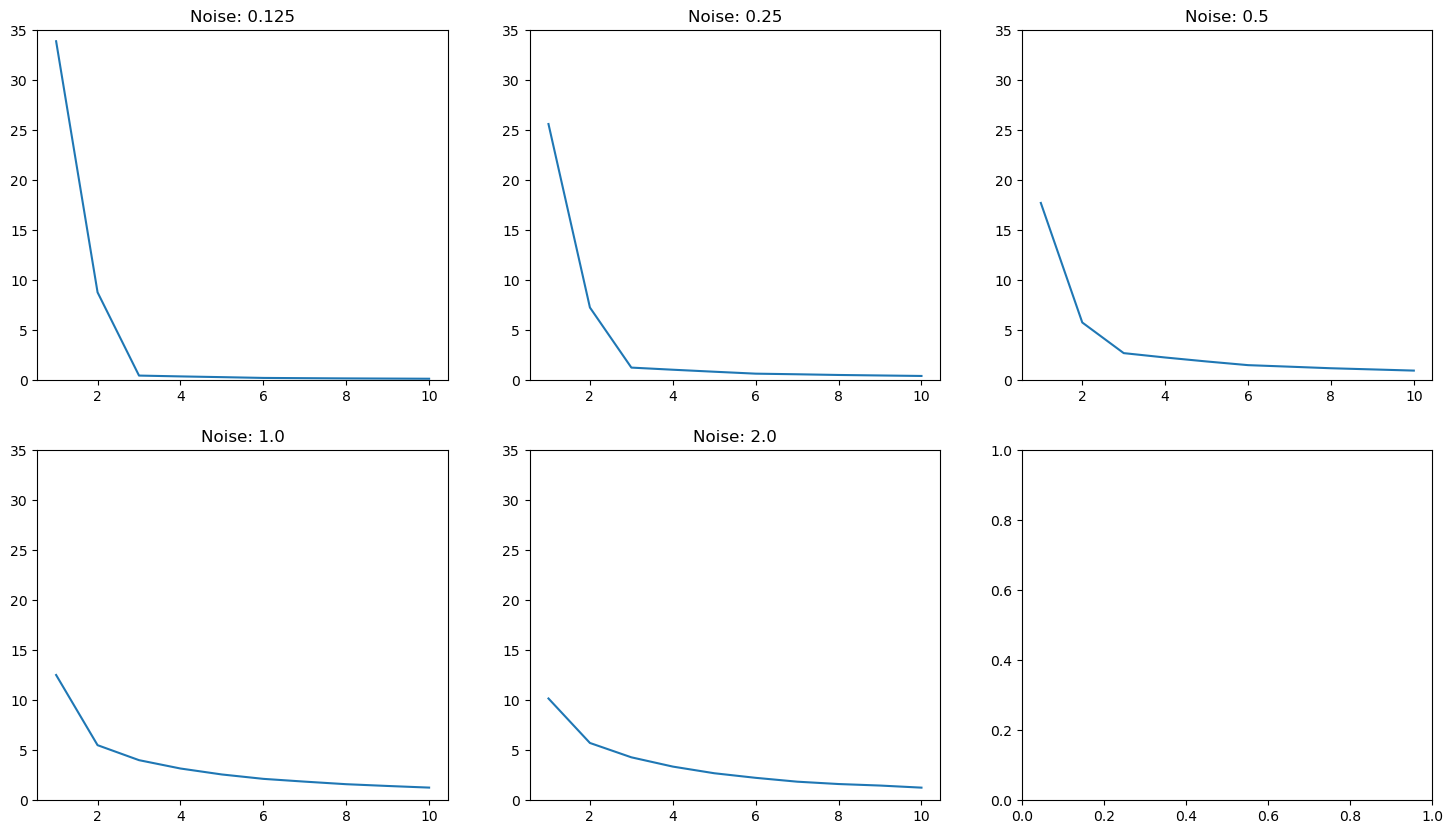

In [38]:
# already have a maxmin function so don't need to write that again :)

# scree plot function (from notes)
def scree(X):
    X = X.loc[:,['x1','x2']]
    X = X.apply(maxmin) # Normalize the data

    # Create a scree plot:
    k_bar = 10
    k_grid = np.arange(1,k_bar+1) # The range of k's to consider
    SSE = np.zeros(k_bar) # We'll store the training error here
    for k in range(k_bar): # For indices from 0 to k_bar-1
        model = KMeans(n_clusters=k+1, max_iter=300, n_init = 10, random_state=0) # Create a model for k
        model = model.fit(X) # Fit the emodel
        SSE[k] = model.inertia_ # Record the sum of squared error for k in the SSE vector
    return k_grid, SSE
    
# make subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 10))


# create each graph, plot on same axes
x, y = scree(df0_125)
p = sns.lineplot(ax=axes[0][0], x=x, y=y) # Create scree plot
p.set_ylim(0,35)
p.set_title('Noise: 0.125')

x, y = scree(df0_25)
p = sns.lineplot(ax=axes[0][1], x=x, y=y) # Create scree plot
p.set_ylim(0,35)
p.set_title('Noise: 0.25')

x, y = scree(df0_5)
p = sns.lineplot(ax=axes[0][2], x=x, y=y) # Create scree plot
p.set_ylim(0,35)
p.set_title('Noise: 0.5')

x, y = scree(df1_0)
p = sns.lineplot(ax=axes[1][0], x=x, y=y) # Create scree plot
p.set_ylim(0,35)
p.set_title('Noise: 1.0')

x, y = scree(df2_0)
p = sns.lineplot(ax=axes[1][1], x=x, y=y) # Create scree plot
p.set_ylim(0,35)
p.set_title('Noise: 2.0')


# you can certainly still tell where the "elbow" is when there is more noise, but it's far less noticable
# that makes it more difficult to tell what the best k value would be
# with an extremely small noise (0.125), it's obvious where the best k value is: 3
#   it's basically a flat line after a significant drop off
# but with a lot of noise, I would probably say 2 is the best k value because there is a bigger drop right before...
#   but even so, the scree line drops pretty steadily after

4. Explain the intuition of the elbow, using this numerical simulation as an example.

The 'elbow' helps identify the ideal number of clusters for the $k$ MC algorithm. The sharper the 'elbow,' the more likely the number at that value for $x$ is an ideal number of clusters. This is because we're graphing $k$ clusters on the $x$ axis, and $SSE$ on the $y$ axis. A larger SSE is certainly not ideal, we want to minimize that value. However, at some point, adding more and more clusters only overly complicates things - each cluster 'provides' less and less as minimizing 'k' has less and less of an effect as we add more and more clusters. Identifying the elbow helps find the optimal number of clusters to include because if $k$ were a bit smaller, we would have very vague, error-prone clusters. However, if $k$ were a bit larger, it wouldn't really make that big of a difference, comparatively.

**Q3.** We looked at computer vision with $k$NN in a previous question. Can $k$ means clustering correctly group digits, even if we don't know which symbols are which? 

1. To load the data, run the following code in a chunk:
```
from keras.datasets import mnist
df = mnist.load_data('minst.db')
train,test = df
X_train, y_train = train
X_test, y_test = test
```
The `y_test` and `y_train` vectors, for each index `i`, tell you want number is written in the corresponding index in `X_train[i]` and `X_test[i]`. The value of `X_train[i]` and `X_test[i]`, however, is a 28$\times$28 array whose entries contain values between 0 and 256. Each element of the matrix is essentially a "pixel" and the matrix encodes a representation of a number. To visualize this, run the following code to see the first ten numbers:
```
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(edgeitems=30, linewidth=100000)
for i in range(5): 
    print(y_test[i],'\n') # Print the label
    print(X_test[i],'\n') # Print the matrix of values
    plt.contourf(np.rot90(X_test[i].transpose())) # Make a contour plot of the matrix values
    plt.show()
```
OK, those are the data: Labels attached to handwritten digits encoded as a matrix.

2. What is the shape of `X_train` and `X_test`? What is the shape of `X_train[i]` and `X_test[i]` for each index `i`? What is the shape of `y_train` and `y_test`?
3. Use Numpy's `.reshape()` method to covert the training and testing data from a matrix into an vector of features. So, `X_test[index].reshape((1,784))` will convert the $index$-th element of `X_test` into a $28\times 28=784$-length row vector of values, rather than a matrix. Turn `X_train` into an $N \times 784$ matrix $X$ that is suitable for scikit-learn's kNN classifier where $N$ is the number of observations and $784=28*28$ (you could use, for example, a `for` loop).
4. Use $k$ means clustering on the reshaped `X_test` data with `k=10`.  
5. Cross tabulate the cluster assignments with the true labels for the test set values. How good is the correspondence? What proportion of digits are clustered correctly? Which digits are the hardest to distinguish from one another? Can $k$MC recover the latent digits 0 to 9, without even knowing what those digits were?
6. If you use a scree plot to determine the number of clusters $k$, does it pick 10 (the true number of digits), or not? If it fails to pick $k=10$, which digits does it tend to combine into the same classification?